In [2]:
import numpy as np
for i in range(20):
    x = np.random.uniform(0, 1, 1000000)
    y = 1-x
    # add the sums
    z = (np.sum(x) + np.sum(y)) - np.sum(x+y)
    # print error
    print(z)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.1641532182693481e-10
0.0
0.0
0.0
0.0
0.0
1.1641532182693481e-10
-1.1641532182693481e-10
0.0


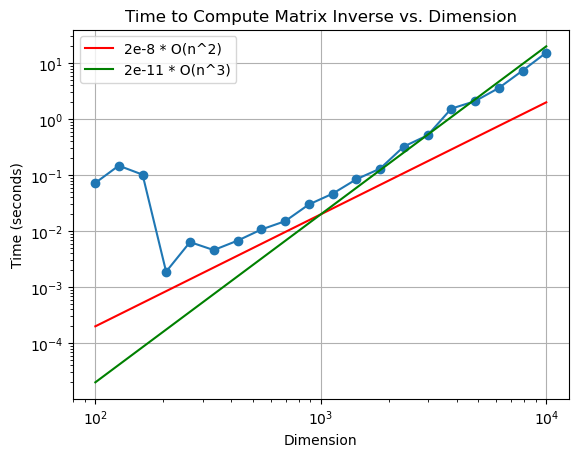

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Create a dictionary to store the times
times = {}

# Loop from 10^2 to 10^4 in 20 evenly spaced steps on the log scale
for i in np.logspace(2, 4, 20, dtype=int):
    # perform 3 experiments for each datapoint
    lil_t = []
    for _ in range(3):
        # Create a random matrix with the given dimension
        A = np.random.rand(i, i)
        # Start the clock
        start = time.time()
        # Calculate the inverse
        np.linalg.inv(A)
        # Stop the clock
        end = time.time()
        # Store the time
        lil_t.append(end - start)
    # Store the avg times in a dictionary with the dimension as the key
    times[i] = np.mean(lil_t)

# Plot the times against the dimension on a log-log scale
plt.plot(list(times.keys()), list(times.values()), marker='o')
# plot to different lines of fit: 2e-8 x o(n^2) and 2e-11 x o(n^3)
plt.plot(list(times.keys()), [2e-8 * i**2 for i in times.keys()], label='2e-8 * O(n^2)', color='red')
plt.plot(list(times.keys()), [2e-11 * i**3 for i in times.keys()], label='2e-11 * O(n^3)', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dimension')
plt.ylabel('Time (seconds)')
plt.title('Time to Compute Matrix Inverse vs. Dimension')
plt.grid(True)
plt.legend()
plt.show()
